# M2608.001300 Machine Learning <br> Assignment #5.2 K-means Clustering 

Copyright (C) Data Science Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Jangho Lee, May 2018

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all parts**, run the *CollectSubmission.sh* script with your **student_id** as input argument. <br>
This will produce a zipped file called *[student_id].zip*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; student_id)

In [23]:
import os
import sys
import numpy as np

from matplotlib import pyplot as plt

In [24]:
# Download xclara data from 'https://vincentarelbundock.github.io/Rdatasets/csv/cluster/xclara.csv' using 'wget'


url = 'https://vincentarelbundock.github.io/Rdatasets/csv/cluster/xclara.csv'
os.system("wget https://vincentarelbundock.github.io/Rdatasets/csv/cluster/xclara.csv")

# Read csv file
f = open("./xclara.csv", "r")
data = f.read()
data = data.split('\n')
f.close()

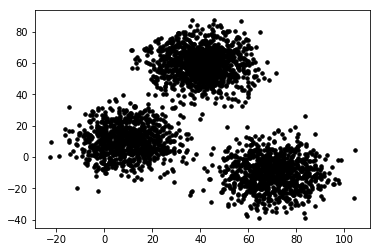

In [25]:
# Extract 'V1' and 'V2' columns
X1 = []
X2 = []

# Combine two columns
#X = 'To do' # e.g. [[x1_1, x2_1], [x1_2, x2_2], ...]
X = []

for x in data[1:-1]:
    temp = x.split(',')
    X1.append(float(temp[1]))
    X2.append(float(temp[2]))
    X.append([float(temp[1]), float(temp[2])])

X = np.array(X)
# Plot the data to check 
plt.scatter(X1, X2, 12, c='black')

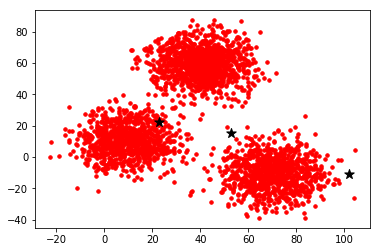

In [26]:
# Set the number of clusters
k = 3

import random
x_min = 100
x_max = -100
y_min = 100
y_max = -100

for x in X1:
    if x_min>x :
        x_min = x
    if x_max<x :
        x_max = x

for y in X2:
    if y_min>y :
        y_min = y
    if y_max<y :
        y_max = y


# Randomly initialize k centroids 
C_x = []
C_y = []

# Combine centroids
C = [] # e.g. [[cx_1, cy_1], [cx_2, cy_2], ...]

for i in range(k):
    C_x.append(random.uniform(x_min, x_max))
    C_y.append(random.uniform(y_min, y_max))

for i in range (len(C_x)):   
    C.append([C_x[i], C_y[i]])

C = np.array(C)

# Plotting the initial centroids
plt.scatter(X1, X2, 12, c= 'red')
plt.scatter(C_x, C_y, 100, c='black', marker='*')

In [27]:
# Take two data points and return euclidean norm 
def distance(x1, x2):
    
    dist = 0
    
    for i in range(len(x1)):
        dist += (x1[i]-x2[i])**2
    
    return dist**0.5

In [28]:

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Declare cluster Lables (0, 1, ..., k)
clusters = np.zeros(len(X))

# Distance between new centroids (C) and old centroids (C_old)
error = 0

# Threshold
threshold = 0.001 # variable

# Loop will run till the error become lower than threshold
while True:
    
    # E-step: assign each data point to its closest cluter centroid
    for i in range(len(X)):
        
        # Calculate the distance between each data point and centeroids
        distances = []
        for j in range(k):
            d = distance(C[j], X[i])
            distances.append(d)
        
        # Assign label which minimize the distance
        cluster = np.argmin(np.array(distances))
        
        # Put i-th cluster label
        clusters[i] = cluster
    
    # Storing the old centroid values
    C_old = []
    for x in C:
        C_old.append(x)
    C_old = np.array(C_old)
    
    
    # M-step: update each centroid by computing mean of all assigned points
    # e.g. assign cluster 0 
    
    for i in range(k):
        C[i] = np.zeros(C[i].shape)
        N = 0
        
        for j in range(len(X)):
            if clusters[j]==i:
                N += 1
                C[i] += X[j]
        C[i] = C[i] / N
        
    
    error = 0.
    for i in range(len(C)):
        error += distance(C[i], C_old[i])
    print('error: ', error) # Sum of squared error
    
    # Escape loop when error is lower than threshold
    if error <= threshold:
        break
        
        """
    # Plot the results with coloring
    colors = ['r', 'g', 'b']
    fig, ax = plt.subplots()
    for i in range(k):
        points = []
        for j in range(len(X)):
            if clusters[j] == i:
                points.append([X[j][0], X[j][1]])
        points = np.array(points)
    
        ax.scatter(points[:, 0], points[:, 1], s=12, c=colors[i])

    # Mark the centroids
    ax.scatter(C[:, 0], C[:, 1], s=100, c='black', marker='*')
    """

error:  44.01117257174329
error:  13.135713809541976
error:  7.615268993347671
error:  15.691439092273782
error:  35.55619317684745
error:  24.733108974762864
error:  1.6305715967270746
error:  0.058544267796889635
error:  0.0


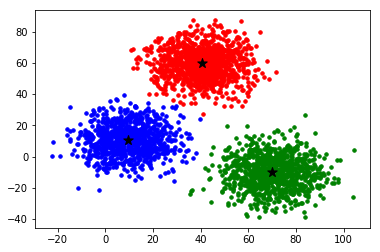

In [29]:
# Plot the results with coloring
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(k):
    points = []
    for j in range(len(X)):
        if clusters[j] == i:
            points.append([X[j][0], X[j][1]])
    points = np.array(points)
    
    ax.scatter(points[:, 0], points[:, 1], s=12, c=colors[i])

# Mark the centroids
ax.scatter(C[:, 0], C[:, 1], s=100, c='black', marker='*')